Learning to Learn - John Tomlinson, Ahan Maurya, Dr. Jing Wang

First we need to import the modules we created for this notebook

In [33]:
import meta_network
import original_network
import numpy as np
import matplotlib.pyplot as plt

In [34]:
# Reload to pick up on-disk changes to original_network
import importlib
importlib.reload(original_network)

<module 'original_network' from 'c:\\Users\\FireSilver\\Desktop\\ltl\\cartpole-implementation\\original_network.py'>

We will start by initializing both of our networks

In [35]:
cartpole_network, cartpole_target_network,memory, optimizer, device, env = original_network.build_model()
meta_network, meta_memory = meta_network.build_model(1,1)

Now lets build a function to graph our reward over time

In [36]:
def plot_rewards(reward_list):
    plt.plot(reward_list)
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.title('Reward over Time')
    plt.show()

Lets make a training loop to get our baseline performance for our model wihtout the meta learning

In [37]:
NUM_EPISODES = 2000
TARGET_UPDATE = 10

In [38]:
def training_loop(episodes):
    total_reward_list = []
    epsilon = 0.1  # Exploration rate
    for episode in range(episodes):
        state, _ = env.reset()
        done = False
        total_reward = 0

        while not done:
            action = original_network.select_action(state, cartpole_network, device, epsilon, env)
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            memory.push(state, action, reward, next_state, done)
            state = next_state
            total_reward += reward

        original_network.optimize_model(cartpole_network, cartpole_target_network, memory, optimizer, device)

        if episode % TARGET_UPDATE == 0:
            cartpole_target_network.load_state_dict(cartpole_network.state_dict())
        
        if episode % 30 == 0:
            print(f"Episode {episode+1}/{episodes}, Total Reward: {total_reward}")
        total_reward_list.append(total_reward)
    return total_reward_list

Episode 1/2000, Total Reward: 10.0
Episode 31/2000, Total Reward: 9.0
Episode 61/2000, Total Reward: 10.0
Episode 91/2000, Total Reward: 11.0
Episode 121/2000, Total Reward: 8.0
Episode 151/2000, Total Reward: 9.0
Episode 181/2000, Total Reward: 13.0
Episode 211/2000, Total Reward: 9.0
Episode 241/2000, Total Reward: 28.0
Episode 271/2000, Total Reward: 8.0
Episode 301/2000, Total Reward: 14.0
Episode 331/2000, Total Reward: 17.0
Episode 361/2000, Total Reward: 42.0
Episode 391/2000, Total Reward: 26.0
Episode 421/2000, Total Reward: 80.0
Episode 451/2000, Total Reward: 67.0
Episode 481/2000, Total Reward: 27.0
Episode 511/2000, Total Reward: 32.0
Episode 541/2000, Total Reward: 58.0
Episode 571/2000, Total Reward: 20.0
Episode 601/2000, Total Reward: 49.0
Episode 631/2000, Total Reward: 46.0
Episode 661/2000, Total Reward: 27.0
Episode 691/2000, Total Reward: 41.0
Episode 721/2000, Total Reward: 39.0
Episode 751/2000, Total Reward: 65.0
Episode 781/2000, Total Reward: 47.0
Episode 811

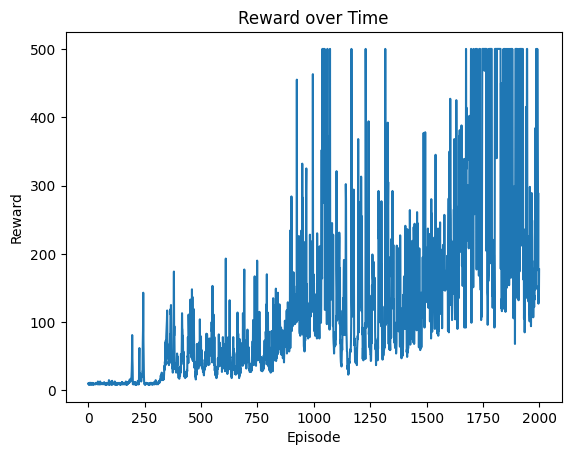

In [39]:
plot_rewards(training_loop(NUM_EPISODES))

Now that we have a baseline for our reinforcenet learning loop we can try training with our met network that will automatically shape our network.

In [40]:
def training_loop(episodes):
    total_reward_list = []
    epsilon = 0.1  # Exploration rate
    for episode in range(episodes):
        state, _ = env.reset()
        done = False
        total_reward = 0

        while not done:
            action = original_network.select_action(state, cartpole_network, device, epsilon, env)
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            memory.push(state, action, (reward+ shaped_reward), next_state, done)
            state = next_state
            total_reward += reward

        original_network.optimize_model(cartpole_network, cartpole_target_network, memory, optimizer, device)

        if episode % TARGET_UPDATE == 0:
            cartpole_target_network.load_state_dict(cartpole_network.state_dict())
        
        if episode % 30 == 0:
            print(f"Episode {episode+1}/{episodes}, Total Reward: {total_reward}")
        total_reward_list.append(total_reward)
    return total_reward_list
    